# Lab 1 -- Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

## 1. The data

In [2]:
# Load the dataset
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt('data1.txt', delimiter=',')

X = data[:, 0:2]
y = data[:, 2]

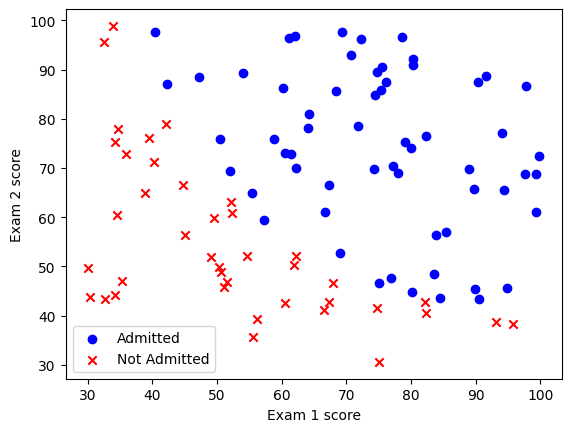

In [3]:
# Plot data
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

In [3]:
#Add intercept term to X
X_new = np.ones((X.shape[0], 3))
X_new[:, 1:] = X
X = X_new

## 2. What is logistic regression 

Logistic regression may be explained from a probabilistic perspective. 

Let us denote $x_{1:m}, y_{1:m} \sim X, Y$ i.i.d observations of $X \in \mathbb{R}^p, Y \in \{0,1\}$.

### The model

Let us consider the following regression model to explain the data
\begin{equation*}
    P_{Y|X=x} = \mathrm{Ber}(p = \sigma(x^\top \theta))
\end{equation*}

### Maximizing the likelihood
Under this model, the probability of observing $(x_i, y_i)$ is
\begin{align*}
    p_{Y|X=x_i}(y_i) &= p^{y_i} (1-p)^{1-y_i} \\
    &= \sigma(x_i^\top\theta)^{y_i} (1-\sigma(x_i^\top\theta))^{1-y_i}
\end{align*}

The optimal value of $\theta$ is chosen to maximize the likelihood of observations that is
\begin{align*}
    \theta^* &= \underset{\theta}{\text{arg max}} \prod_{i=1}^m p_{Y|X=x_i}(y_i) \\
    &= \underset{\theta}{\text{arg max}} \sum_{i=1}^m \log p_{Y|X=x_i}(y_i) \\
    &= \underset{\theta}{\text{arg max}} \sum_{i=1}^m y_i \log \sigma(\theta^\top x_i) + (1-y_i) \log (1-\sigma(\theta^\top x_i)) \\
    &= \underset{\theta}{\text{arg min}} -\frac{1}{m} \sum_{i=1}^m y_i \log \sigma(\theta^\top x_i) + (1-y_i) \log (1-\sigma(\theta^\top x_i)) \\
    &= \underset{\theta}{\text{arg min}} \quad J(\theta)
\end{align*}

## 3. Implementation

### 3.1 The sigmoid

In [4]:
from sigmoid import sigmoid
def logit(z):
    return np.log(z/(1-z))

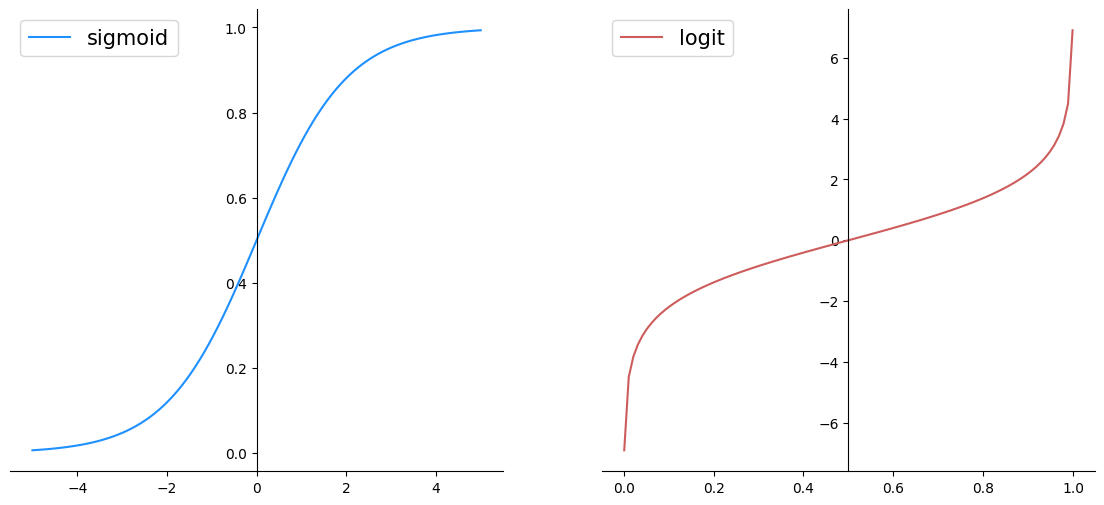

In [5]:
# Plot sigmoid and logit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
Xplot = np.linspace(-5, 5, 100)
Yplot = sigmoid(Xplot)
ax[0].plot(Xplot, Yplot, color='dodgerblue', label='sigmoid')
Xplot = np.linspace(0.001, 0.999, 100)
Yplot = logit(Xplot)
ax[1].plot(Xplot, Yplot, color='indianred', label='logit')
for i in range(2):
    ax[i].legend(loc='best', fontsize=15)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_position('center')
plt.show(fig)

In [6]:
def test_sigmoid():
    # scalar test
    z, s = 0.5, 0.622459
    if np.abs(sigmoid(z)-s) < 1e-5:
        print("scalar test passed")
    else:
        raise ValueError("scalar test not passed!")

    # vector test
    z, s = np.array([1,-1,0.5]), np.array([0.73105858, 0.26894142, 0.62245933])
    if np.sum(np.abs(sigmoid(z)-s)) < 1e-5:
        print("vector test passed")
    else:
        raise ValueError("vector test not passed!")

test_sigmoid()

scalar test passed
vector test passed


### 3.2 The cost function $J(\theta)$

The cost function is the following

\begin{equation}
    J_\theta = -\frac{1}{m} \sum_{i=1}^m y_i \log(\sigma(x_i^T\theta)) + (1-y_i) \log(1 -\sigma(x_i^T\theta))
\end{equation}

In a matrix notation
\begin{equation}
    \text{PLEASE FIND THE MATRIX FORM}
\end{equation}

In [13]:
from computeCost import computeCost2

ImportError: cannot import name 'computeCost2' from 'computeCost' (c:\Users\Emilien\DL projects\machine-learning-course\2EL1730-ML-Lab1\computeCost.py)

In [11]:
def test_computeCost():
    # test 1
    theta, cost = [0, 0, 0], 0.6931471
    print('cost',np.array(theta),X,y)
    if np.abs(computeCost(np.array(theta),X,y)-cost) < 1e-5:
        print("test 1 passed")
    else:
        raise ValueError("test 1 not passed!")

    # test 2
    theta, cost = [-0.01, 0.05, 0], 1.092916
    if np.abs(computeCost(np.array(theta),X,y)-cost) < 1e-5:
        print("test 2 passed")
    else:
        raise ValueError("test 2 not passed!")

test_computeCost()

cost [0 0 0] [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.       

ValueError: shapes (3,) and (100,3) not aligned: 3 (dim 0) != 100 (dim 0)

### 3.3 The gradient function

The gradient of the cost function is given by
\begin{equation}
    \text{PLEASE FIND THE GRADIENT}
\end{equation}

In [ ]:
# Dependence on X,y is implicit
# X, y are defined globally
def computeGrad(theta):
    # Computes the gradient of the cost with respect to
    # the parameters.

    # YOUR CODE HERE

In [ ]:
def test_computeGrad():
    # test 1
    theta, grad = [0, 0, 0], np.array([ -0.1, -12.00921659, -11.26284221])
    if np.sum(np.abs(computeGrad(theta)-grad)) < 1e-5:
        print("test 1 passed")
    else:
        raise ValueError("test 1 not passed!")

    # test 2
    theta, grad = [0.02, 0, -0.04], np.array([-0.51775522, -39.39901278, -39.85199474])
    if np.sum(np.abs(computeGrad(theta)-grad)) < 1e-5:
        print("test 2 passed")
    else:
        raise ValueError("test 2 not passed!")

test_computeGrad()

### 3.4 Solve the optimization problem (i.e., fit the model to the data)

In [ ]:
# Run minimize() to obtain the optimal theta
Result = op.minimize(fun=computeCost, x0=theta,
                     method = 'TNC', jac=computeGrad);

In [ ]:
Result

### 3.5 Visualize the fit

The decision boundary is given by

\begin{equation}
\sigma(\theta^T x) = 0.5 \iff \theta^T x = 0
\end{equation}

i.e
\begin{equation}
  x_2 = -\frac{\theta_1}{\theta_2}x_1 - \frac{\theta_0}{\theta_2}
\end{equation}

In [ ]:
# Plot the decision boundary
plot_x = np.array([min(X[:, 1]), max(X[:, 1])])
plot_y = (- 1.0 / theta[2]) * (theta[1] * plot_x + theta[0])
plt.plot(plot_x, plot_y)
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Decision Boundary', 'Admitted', 'Not Admitted'])
plt.show()

### 3.6 Evaluate the model

In [ ]:
def predict(theta, X):
    # Predict whether the label is 0 or 1 using learned logistic
    # regression parameters theta. The threshold is set at 0.5

    # YOUR CODE HERE

In [ ]:
def test_predict():
    # test 1
    X_test, y_pred = np.array([[1,40, 20], [1,40,80], [1,80,80]]), np.array([0,0,1])
    if np.sum(np.abs(y_pred - predict(Result.x, X_test))) == 0:
        print("test 1 passed")
    else:
        raise ValueError("test 1 not passed!")

    # test 2
    X_test, y_pred = np.array([[1,70, 50], [1,70,40]]), np.array([0,0])
    if np.sum(np.abs(y_pred - predict(Result.x, X_test))) == 0:
        print("test 2 passed")
    else:
        raise ValueError("test 2 not passed!")

test_predict()

In [ ]:
# Compute accuracy on the training set
p = predict(Result.x, X)
counter = 0
for i in range(y.size):
    if p[i] == y[i]:
        counter += 1
print('Train Accuracy: {:.2f}'.format(counter / float(y.size) * 100.0))